# Árvore de decisão

O target numérico é a largura do bico, que será prevista a partir de parâmetros como a profundidade desse bico, massa corporal, etc. Um futuro target categórico pode ser a espécie do pinguim.

In [107]:
import seaborn as sns

df = sns.load_dataset('penguins')
print(df.dtypes)
#print(df)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [108]:
# importa a biblioteca para plotar os gráficos
import matplotlib.pyplot as plt

In [109]:
# Converte os dados
df = df.convert_dtypes() 
print(df.dtypes)
#print(df)

species               string
island                string
bill_length_mm       Float64
bill_depth_mm        Float64
flipper_length_mm      Int64
body_mass_g            Int64
sex                   string
dtype: object


In [110]:
# Elimina as linhas que possuem lacunas sem dados
dfcopia = df.copy()
dfcopia = dfcopia.dropna(axis=0)

#print(dfcopia)


In [111]:
# Cria um dataset somente com os features numéricos
features_numericos = ["bill_length_mm","bill_depth_mm", "flipper_length_mm", "body_mass_g"]
df_numericos = dfcopia[features_numericos]

print(df_numericos)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7                181         3750
1              39.5           17.4                186         3800
2              40.3           18.0                195         3250
4              36.7           19.3                193         3450
5              39.3           20.6                190         3650
..              ...            ...                ...          ...
338            47.2           13.7                214         4925
340            46.8           14.3                215         4850
341            50.4           15.7                222         5750
342            45.2           14.8                212         5200
343            49.9           16.1                213         5400

[333 rows x 4 columns]


In [112]:
df_normalizado = df_numericos.copy()

#normalizando coluna por coluna com o método de mínimo e máximo:

#primeira coluna (comprimento do bico)
maximo_bill_length = df_normalizado['bill_length_mm'].max()
minimo_bill_length = df_normalizado['bill_length_mm'].min()

df_normalizado['bill_length_norm'] = (df_normalizado['bill_length_mm'] - minimo_bill_length) / (maximo_bill_length - minimo_bill_length)

#segunda coluna (profundidade do bico)
maximo_bill_depth = df_normalizado['bill_depth_mm'].max()
minimo_bill_depth = df_normalizado['bill_depth_mm'].min()

df_normalizado['bill_depth_norm'] = (df_normalizado['bill_depth_mm'] - minimo_bill_depth) / (maximo_bill_depth - minimo_bill_depth)

#terceira coluna (envergadura das nadadeiras)
maximo_flipper_length = df_normalizado['flipper_length_mm'].max()
minimo_flipper_length = df_normalizado['flipper_length_mm'].min()

df_normalizado['flipper_length_norm'] = (df_normalizado['flipper_length_mm'] - minimo_flipper_length) / (maximo_flipper_length - minimo_flipper_length)

#quarta coluna (peso corporal)
maximo_body_mass = df_normalizado['body_mass_g'].max()
minimo_body_mass = df_normalizado['body_mass_g'].min()

df_normalizado['body_mass_norm'] = (df_normalizado['body_mass_g'] - minimo_body_mass) / (maximo_body_mass - minimo_body_mass)
#print(df_normalizado)

#criando um novo dataframe só com os dados normalizados.
df_normalizado2 = df_normalizado.reindex(["bill_length_norm","bill_depth_norm","flipper_length_norm","body_mass_norm"],axis=1)

print(df_normalizado2)

     bill_length_norm  bill_depth_norm  flipper_length_norm  body_mass_norm
0            0.254545         0.666667             0.152542        0.291667
1            0.269091         0.511905             0.237288        0.305556
2            0.298182         0.583333             0.389831        0.152778
4            0.167273         0.738095             0.355932        0.208333
5            0.261818         0.892857             0.305085        0.263889
..                ...              ...                  ...             ...
338          0.549091         0.071429             0.711864        0.618056
340          0.534545         0.142857             0.728814        0.597222
341          0.665455         0.309524             0.847458        0.847222
342          0.476364         0.202381             0.677966        0.694444
343          0.647273         0.357143             0.694915            0.75

[333 rows x 4 columns]


In [113]:
# análises exploratória e estatística dos dados:

print(df_normalizado2.shape) # checando o tamanho do dataframe (333 linhas e 4 colunas)
print(df_normalizado2.index) # nota-se que o index não está ordenado, apresentando lacunas.

(333, 4)
Int64Index([  0,   1,   2,   4,   5,   6,   7,  12,  13,  14,
            ...
            332, 333, 334, 335, 337, 338, 340, 341, 342, 343],
           dtype='int64', length=333)


In [114]:
# para resolver esse problema, utiliza-se o método reset_index:
df_arrumado = df_normalizado2.reset_index(drop=True) # no qual drop=True significa que a nova coluna index irá substituir a anterior completamente,
# ao invés de apenas ser acrescentada como mais uma coluna.

### Algorítmo da Árvore de decisão:

In [115]:
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455
FEATURES = ["bill_depth_norm", "flipper_length_norm", "body_mass_norm"]
TARGET = ["bill_length_norm"]

df = df_arrumado #Estamos utilizando os dados já tratados!

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

In [116]:
from sklearn.tree import DecisionTreeRegressor

# cria o modelo
modelo_dt = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(previsao) 

[0.31636364 0.16363636 0.36727273 0.61818182 0.59636364 0.48727273
 0.03636364 0.12363636 0.23636364 0.59636364 0.37090909 0.27272727
 0.34181818 0.67636364 0.29818182 0.12363636 0.51272727 0.27636364
 0.65818182 0.27636364 0.25454545 0.14909091 0.66909091 0.72363636
 0.34181818 0.14181818 0.47272727 0.75272727 0.72727273 0.68
 0.13818182 0.10909091 0.32727273 0.42545455]


In [117]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Realizaremos agora uma avaliação do desempenho do modelo de árvores de decisão.
y_verdadeiro = y_teste
y_previsao = modelo_dt.predict(X_teste)

#Para isso, avaliaremos as métricas geradas com os dados das previsões:
RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
MSE = mean_squared_error(y_verdadeiro, y_previsao)
R2 = r2_score(y_verdadeiro, y_previsao)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE} mm normalizados; \nO MSE do modelo árvore de decisão foi de {MSE} mm normalizados;\nE o R² do modelo árvore de decisão foi de {R2} mm normalizados. ")

O RMSE do modelo árvore de decisão foi de 0.20472303640149236 mm normalizados; 
O MSE do modelo árvore de decisão foi de 0.04191152163344677 mm normalizados;
E o R² do modelo árvore de decisão foi de -0.1626654667721017 mm normalizados. 


Essa árvore de decisão não prevê resultados bons como se pode ver analisando seu RMSE, MSE, e o R². No entanto, ao mexermos nos hiperparâmetros de geração, podemos otimizar o resultado.

#### Mexendo com hiperparâmetros de árvore de decisão:

Existem dois hiperparâmetros principais quando se trata de modelos de árvore de decisão: A quantidade de folhas (vértices terminais) e quantidade de ramificações em sequência (profundidade).
Quando alteramos os valores desses hiperparâmetros, podemos otimizar a previsão do modelo, este que será avaliado por meio de três métricas: o RMSE, o MSE e o R².

In [118]:
from itertools import product

NUM_FOLHAS = [None, 10, 14]
NUM_PROFUNDIDADE = [None, 5, 8]

for n_folhas, n_profundidade, in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_dt.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_dt.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    MSE = mean_squared_error(y_verdadeiro, y_previsao)
    R2 = r2_score(y_verdadeiro, y_previsao)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas}"
        f",max_depth={n_profundidade} e min_samples_leaf={m_samples_leaf} foi de {RMSE:.3f} mm normalizados.",
        f"\nO MSE do modelo AD usando esses mesmos valores de hiperparâmetro foi de {MSE:.3f} mm normalizados."
        f"\nE, por fim, o R² do modelo AD usando esses mesmos valores de hiperparâmetro foi de {R2:.3f} mm normalizados.\n"
        
    )

O RMSE do modelo AD usando max_leaf_nodes=None,max_depth=None e min_samples_leaf=None foi de 0.205 mm normalizados. 
O MSE do modelo AD usando esses mesmos valores de hiperparâmetro foi de 0.042 mm normalizados.
E, por fim, o R² do modelo AD usando esses mesmos valores de hiperparâmetro foi de -0.163 mm normalizados.

O RMSE do modelo AD usando max_leaf_nodes=None,max_depth=5 e min_samples_leaf=None foi de 0.152 mm normalizados. 
O MSE do modelo AD usando esses mesmos valores de hiperparâmetro foi de 0.023 mm normalizados.
E, por fim, o R² do modelo AD usando esses mesmos valores de hiperparâmetro foi de 0.361 mm normalizados.

O RMSE do modelo AD usando max_leaf_nodes=None,max_depth=8 e min_samples_leaf=None foi de 0.197 mm normalizados. 
O MSE do modelo AD usando esses mesmos valores de hiperparâmetro foi de 0.039 mm normalizados.
E, por fim, o R² do modelo AD usando esses mesmos valores de hiperparâmetro foi de -0.075 mm normalizados.

O RMSE do modelo AD usando max_leaf_nodes=10,ma

Analisando essas diferentes combinações de valores de hiperparâmetros de quantidade de folhas e da profundidade da Árvore de Decisão, chego na conclusão de que a máxima quantidade de folhas permitida é o fator mais importante para a otimização da árvore de decisão. O valor ótimo que se pode ter com nossos dados é 14 folhas no máximo, e a profundidade de árvore de decisão gerada será  de valor 5 (qualquer valor a mais não muda a árvore gerada, mas se cortamos a profundidade para 8, já perdemos um pouco da precisão do modelo).

É importante ressaltar que essa árvore de decisão ótima tem maior eficiência para essa semente de dados randomizados. Em outras sementes, os resultados provavelmente não serão reproduzidos.

Abaixo está uma visualização dessa Árvore de decisão mais precisa, com 15 folhas no máximo e 8 de profundidade.

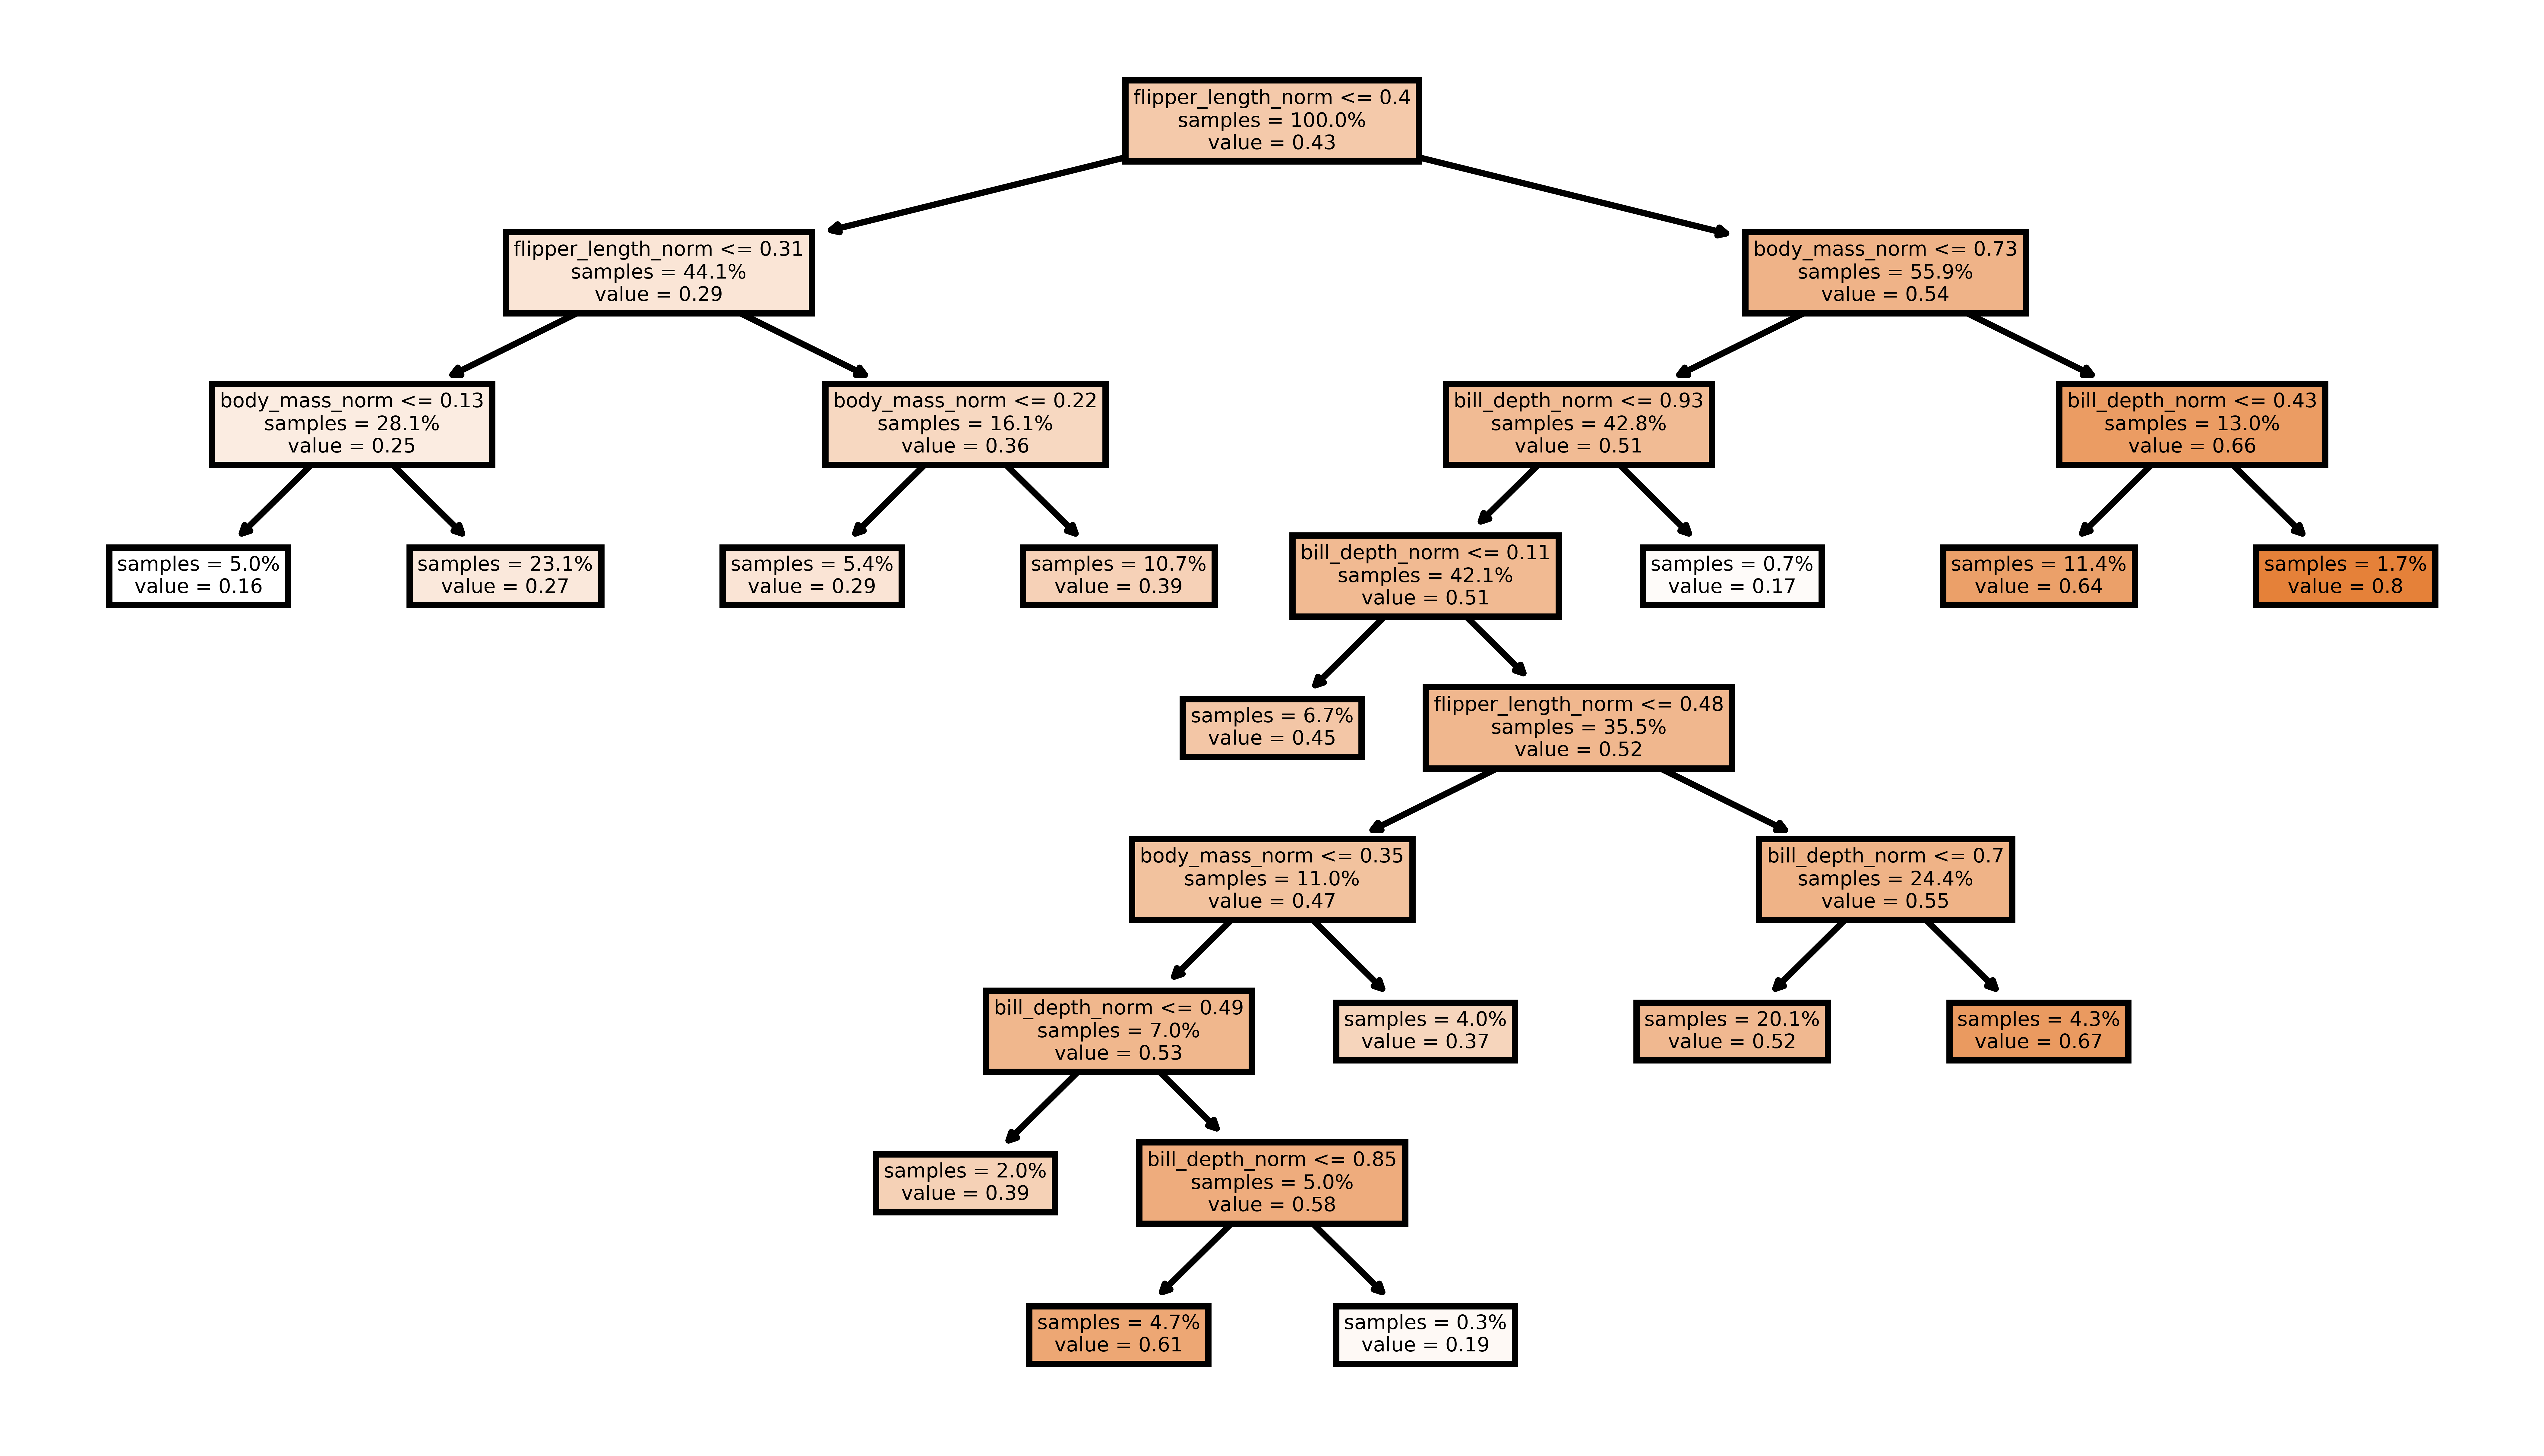

In [119]:
from matplotlib import pyplot as plt
from sklearn import tree

# cria e treina o modelo
modelo_dt = DecisionTreeRegressor(
    max_leaf_nodes=14, max_depth=18,
    random_state=SEMENTE_ALEATORIA,
)
modelo_dt.fit(X_treino, y_treino)

# cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(7, 4),
    dpi=1500,
)

# plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)

# mostra o plot para o usuário
plt.show()